# Tercer Parcial GIOVANNY DZUL

### Contexto:
Se obtuvo un DATAFRAME de 10000 registros sobre naranjas y toronjas (50%  naranjas y 50% toronjas), se obtienen datos importantes sobre estos como su peso, diametro y su color distribuido en 3 columnas por codigos RGB con el que se identifico cada una. Puede ser facil de identificar para un ser humano pero para la maquina no es asi, quizás se implemente una maquina que separe ambas frutas conforme a datos que ya aprendió anteriormente. Se realizará ambos modelos para identificar la diferencia entre ambos en base a su peso y diametro.

### Clasificación con Árboles de Decisión

In [488]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [489]:
# Importacion del dataset
df = pd.read_csv('https://raw.githubusercontent.com/giodp2408/bigdata2020UTM/master/MyPython/Tercerparcial/citrus.csv')

# El Dataframe tiene dos unicos valores String, se requiere que sean numericos así que se reemplazan por 1 y 0 
df.loc[df['name'].values == 'orange', 'name'] = 0
df.loc[df['name'].values == 'grapefruit', 'name'] = 1

# Selecciona los valores independientes X (Diametro y peso)
# Serviran como apoyo para realizar la clasificación
X = df.iloc[:, [1,2]].values

# Selecciona los valores dependientes Y (Nombre)
# Este valor es la principal caracteristica para realizar la clasificación
y = df.iloc[:, 0].values

# Para que no existan errores por dtype, es necesario realizar la conversión a INT
y=y.astype('int')

# Imprimir Tabla
print("Naranjas vs Toronjas")
df

Naranjas vs Toronjas


,name,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,1,15.35,253.89,149,77,20
9996,1,15.41,254.67,148,68,7
9997,1,15.59,256.50,168,82,20
9998,1,15.92,260.14,142,72,11


Naranjas vs Toronjas


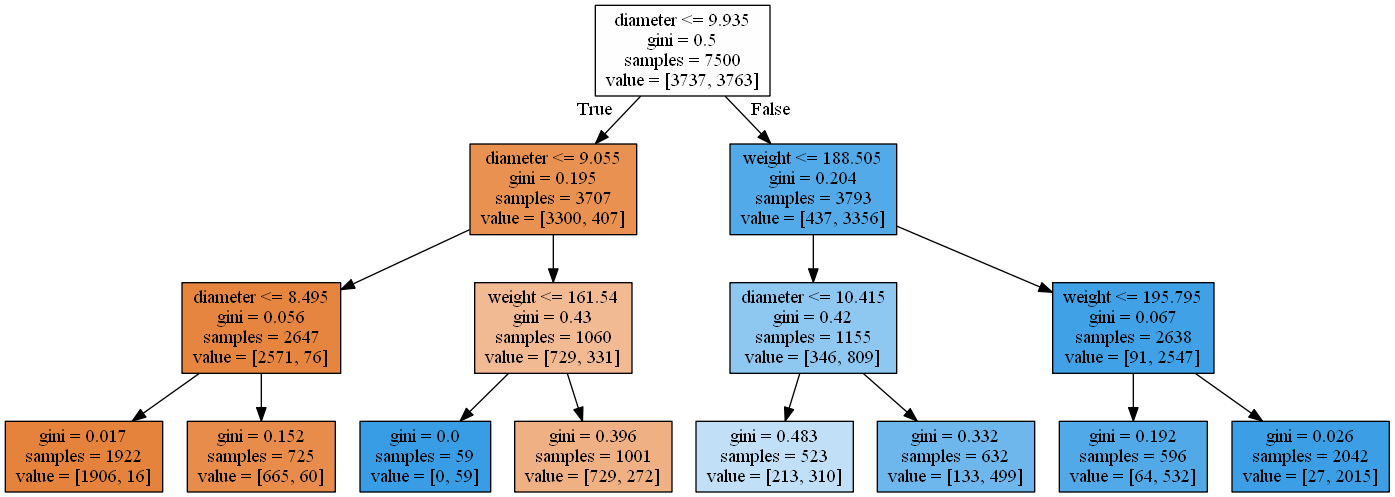

In [490]:
# Division del conjunto de datos en datos de entrenamiento y datos de prueba, es decir, se crean 4 variables:
# 2 para train y 2 para test, se requiere X y Y, cuantos niveles de profundidad tendra el arbol, etc.
# El test_size define cuanto se asigna para la predicción mientras que el resto servira para el árbol
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Creamos el Árbol de Decisión para Classificación y lo entrenamos
classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X_train, y_train)

# Exportamos el arbol de DOT a PNG. Establemos un color para Naranja (Naranja) y y Toronja (Azul)
dot_data = tree.export_graphviz(classifier, out_file=None, filled=True, feature_names=['diameter', 'weight'])
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostramos Arbol
print("Naranjas vs Toronjas")
Image(graph.create_png())

# NOTA: Dependiedo del GINI o nivel de pureza de la clasificacion, define la intensidad del color.
# Si GINI es mayor a 0.5, es impuro y no obtiene un color.
# Samples son las muestras seleccionadas.
# Value es la clasificaciones de clases

In [491]:
#Realiza una predicción
y_pred = classifier.predict(X_test)

#Se emplea la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)

#Calcular la precisión del modelo
precision = precision_score(y_test, y_pred)

#Imprimir resultados
print('Matriz de Confusión:')
print(matriz)
print()
print('Precisión del modelo:')
print(precision * 100)

# NOTA: Se observa en la matriz que 1099 fueron verdaderos positivos mientras que 1128 fueron falsos positivos
# El resto significa los datos que no predijo correctamente el modelo.
# La precisión nos muestra el porcentaje de efectividad, no es 100% preciso pero se justifica por la lista enorme de datos

Matriz de Confusión:
[[1099  164]
 [ 109 1128]]

Precisión del modelo:
87.30650154798761


### Regresión Logística

In [492]:
# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [493]:
# Importacion del dataset
df = pd.read_csv('https://raw.githubusercontent.com/giodp2408/bigdata2020UTM/master/MyPython/Tercerparcial/citrus.csv')

# El Dataframe tiene dos unicos valores String, se requiere que sean numericos así que se reemplazan por 1 y 0 
df.loc[df['name'].values == 'orange', 'name'] = 0
df.loc[df['name'].values == 'grapefruit', 'name'] = 1

# Selecciona los valores independientes X (Diametro y peso)
# Serviran como apoyo para realizar la clasificación
X = df.iloc[:, [1,2]].values

# Selecciona los valores dependientes Y (Nombre)
# Este valor es la principal caracteristica para realizar la clasificación
y = df.iloc[:, 0].values

# Para que no existan errores por dtype, es necesario realizar la conversión a INT
y=y.astype('int')

# Imprimir Tabla
print("Naranjas vs Toronjas")
df

Naranjas vs Toronjas


,name,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,1,15.35,253.89,149,77,20
9996,1,15.41,254.67,148,68,7
9997,1,15.59,256.50,168,82,20
9998,1,15.92,260.14,142,72,11


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


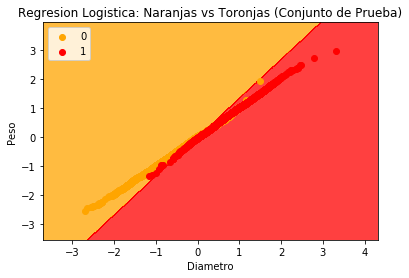

Nota: El 0 se refiere a las naranjas mientras que el 1 se refiere a toronjas


In [494]:
# Division del conjunto de datos en datos de entrenamiento y datos de prueba, es decir, se crean 4 variables:
# 2 para train y 2 para test, se requiere X y Y que se obtuvo anteriormente
# El test_size define cuanto se asigna para la predicción mientras que el resto servira para el diagrama
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Ajuste de escalas, necesario para ajustar la diferencia de valores entre Diametro y Peso
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Ajuste de la regresion logistica al conjunto de entrenamiento: X_train y y_train
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Se realiza la predicción
y_pred = classifier.predict(X_test)

# Visualizacion de los resultados de Prueba. Se importa la biblioteca de Matplolib para graficar
# Se requiere las variables de test. Se pueden realizar cambios como de color pero el codigo se mantiene así.
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'red'))(i), label = j)
plt.title('Regresion Logistica: Naranjas vs Toronjas (Conjunto de Prueba)')
plt.xlabel('Diametro')
plt.ylabel('Peso')
plt.legend()
plt.show()
print("Nota: El 0 se refiere a las naranjas mientras que el 1 se refiere a toronjas")

# NOTA: El diagrama se dvidide por color, donde el naranja se refiere a las naranjas mientras que el rojo se refiere
# a las toronjas, el modelo así clasifico ambos, se observa que la mayoria de los puntos rojos se encuentran en su campo
# y lo mismo sucede para los puntos naranjas. Los puntos fuera de su campo de color son datos que no se pudieron clasificar
# o el modelo no pudo adaptarlo al 100% debido a la gran lista de datos. Para saber sobre eso, se conseguira la precisión del
# del modelo.

In [495]:
#Realiza una predicción
y_pred = classifier.predict(X_test)

#Se emplea la matriz de Confusión
matriz = confusion_matrix(y_test, y_pred)

#Calcular la precisión del modelo
precision = precision_score(y_test, y_pred)

#Imprimir resultados
print('Matriz de Confusión:')
print(matriz)
print()
print('Precisión del modelo:')
print(precision * 100)

# NOTA: Se observa en la matriz que 1133 fueron verdaderos positivos mientras que 1130 fueron falsos positivos
# El resto significa los datos que no predijo correctamente el modelo.
# La precisión nos muestra el porcentaje de efectividad, no es 100% preciso pero se justifica por la lista enorme de datos

Matriz de Confusión:
[[1133  130]
 [ 104 1133]]

Precisión del modelo:
89.7070467141726


### Conclusión
* La matriz de confusión es muy util para la efectividad del modelo.
* El segundo modelo fue más preciso que el primero por una diferencia minima.
* Su precisión no es del 100% pero se puede comprender debido a la lista enorme de registros.
* En caso de implementar el color registrado de cada fruta, la precisión de los modelos aumentaría pero sería más extenso.

##### Links
* https://www.kaggle.com/joshmcadams/oranges-vs-grapefruit
* https://www.jacobsoft.com.mx/es_mx/clasificacion-con-arboles-de-decision/
* https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/ 
* https://www.jacobsoft.com.mx/es_mx/regresion-logistica/
* https://iartificial.net/arboles-de-decision-con-ejemplos-en-python/
* https://ligdigonzalez.com/algoritmo-regresion-logistica-machine-learning-practica-con-python/